# Awake Labs Coding Challenge

## Libraries

In [22]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## User Tuned Variables

In [23]:
data_file = "Coding Challenge - Software Dev Internship.json"
y_var_opts = ['currentBpm', 'anxietyLevel', 'baselineProgress', 'batteryLevel'] # possible y values
y_var = y_var_opts[0]
drop_factor = 2 # rate at which data is dropped (eg: factor=2 means every other data point is kept)

# === VARIABLES RELATED TO TIME RANGE FILTER ===
# Filter range (y, m, d, h, min, s)
start = datetime(2021, 4, 20, 12, 0, 0) # start time range
end = datetime(2021, 4, 20, 18, 0, 0) # end time range

## Input Data

In [24]:
# Input data from json file
with open(data_file, "r") as read_file:
    data = json.load(read_file)
key = list(data.keys())[0]
data = data[key]

## Pre-processing

In [25]:
# Time range calcs
time_range = (end-start).days * 24 + (end-start).seconds / (60 * 60) + (end-start).microseconds / (60 * 60 * 1000)
time_range = int(np.ceil(time_range))
x_ticks = [start + timedelta(hours=i) for i in range(0, time_range)] # markers for x-axis

In [27]:
# Data calcs
def get_y_val(i, y_opt):
    return json.loads(data[i]['data'])['state'][y_opt] if y_opt == "batteryLevel" else json.loads(data[i]['data'])[y_opt]

length = len(data) // drop_factor

# convert data to a dictionary by timestamp
reduced_data = {datetime.fromtimestamp(json.loads(data[i*drop_factor]['data'])['time']/1000):{y_opt:[] for y_opt in y_var_opts} for i in range(length)}
for i in range(length):
    for y_opt in y_var_opts:
        reduced_data[datetime.fromtimestamp(json.loads(data[i*drop_factor]['data'])['time']/1000)][y_opt].append(get_y_val(i*drop_factor, y_opt))

# generate list of x values
x = list(reduced_data.keys())
x.sort()
# get avg y value for each x value
for key in x:
    for y_opt in y_var_opts:
        reduced_data[key][y_opt] = sum(reduced_data[key][y_opt])/len(reduced_data[key][y_opt])

## Main

In [28]:
# filter data by timerange and chosen y variable
filt_x = list(filter(lambda dt:start <= dt and dt < end, x))
filt_y = [reduced_data[i][y_var] for i in filt_x]

## Output

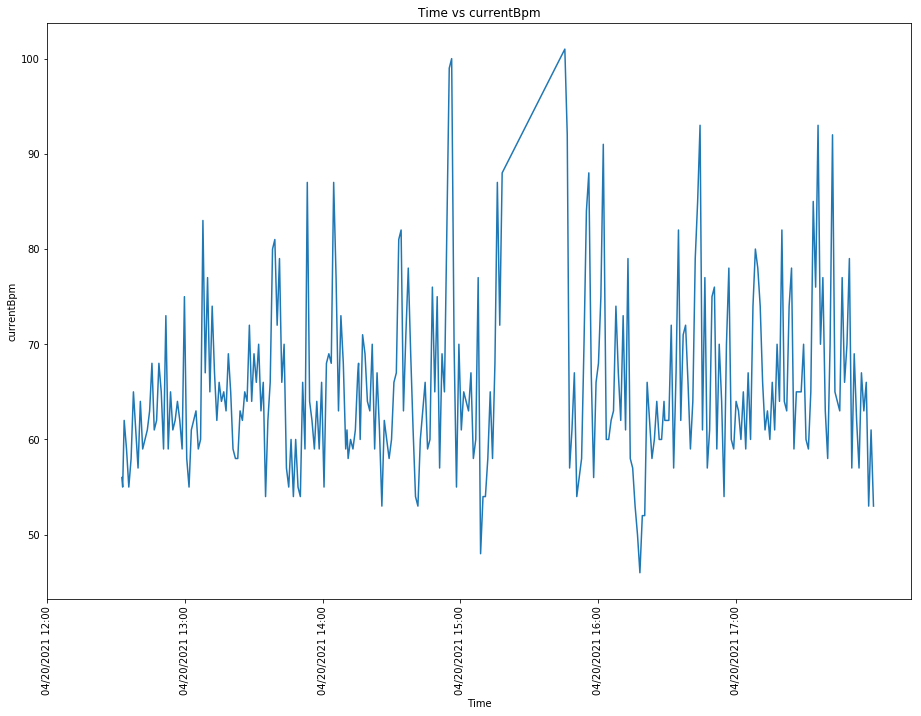

In [29]:
# output plot
fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2])
plt.title('Time vs ' + y_var)
plt.xlabel('Time')
plt.ylabel(y_var)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(filt_x,filt_y)
plt.xticks(x_ticks)
plt.xticks(rotation=90)
plt.show()